# 1. Import bibliotek.


In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning) #turn off warnings

import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import numpy as np
import seaborn as sns
from scipy.stats import skew, kurtosis, bootstrap
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# 2. Pobieranie danych.


$X_1$ - procent palących w danym kraju \
$X_2$ - procent palących mniej niż 20 papierosów na dzień \
$X_3$ - procent palących więcej niż 20 papierosów na dzień \
$X_4$ - procent palących zamieszkujących tereny metropolii miejskich \
$X_5$ - procent palących zamieszkujących tereny małych miast \
$X_6$ - procent palących zamieszkujących tereny wiejskie \
$X_7$ - procent palących mężczyzn \
$X_8$ - procent palących kobiet \
$X_9$ - procent palących z przedziału wiekowego 15 - 19 lat \
$X_{10}$ - procent palących z przedziału wiekowego 15 - 24 lata \
$X_{11}$ - procent palących z przedziału wiekowego 15 - 29 lat \
$X_{12}$ - procent palących z przedziału wiekowego 15 - 64 lata \
$X_{13}$ - procent palących z przedziału wiekowego 18 - 24 lata \
$X_{14}$ - procent palących posiadających co najmniej 18 lat. \
$X_{15}$ - procent palących z przedziału wiekowego  20 - 24 lata \
$X_{16}$ - procent palących z przedziału wiekowego 25 - 29 lata \
$X_{17}$ - procent palących z przedziału wiekowego 25 - 34 lata \
$X_{18}$ - procent palących z przedziału wiekowego 35 - 44 lata \
$X_{19}$ - procent palących z przedziału wiekowego 45 - 54 lata \
$X_{20}$ - procent palących z przedziału wiekowego 45 - 64 lata \
$X_{21}$ - procent palących z przedziału wiekowego 55 - 64 lata \
$X_{22}$ - procent palących z przedziału wiekowego 65 - 74 lata \
$X_{23}$ - procent palących posiadających co najmniej 65 lat \
$X_{24}$ - procent palących posiadających co najmniej 75 lat 

Wczytanie danych do DataFrame

In [2]:
df = pd.read_excel('Data.xlsx').set_index('Country')

# 3. Eksploracja zbioru danych.

## Ile brakujących wartości dla każdej zmiennej?

In [3]:
np.sum(np.isnan(df), axis=0)

X1     0
X2     0
X3     0
X4     2
X5     2
X6     2
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
dtype: int64

Widzimy braki wartości w $X_4$, $X_5$, $X_6$

## W jakich krajach są braki danych?


In [4]:
np.sum(np.isnan(df), axis=1)[np.sum(np.isnan(df), axis=1) > 0]

Country
Serbia     3
Türkiye    3
dtype: int64

Turcja i Serbia. Uzupełnienie tych danych zerami może być niewłaściwe, ze względów merytorycznych (w tych krajach te zmienne spodziewamy się, że przyjęły o wiele większe wartości).

## Uzupełnianie brakujących danych

Do uzupełnienia braków posłużymy się obiektem klasy [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) z pakietu sci-kit learn. Wartości hyperparametrów będą ustawione domyślnie (liczba sąsiadów = 5, odległość euklidesowa).

In [5]:
imputer = KNNImputer()
new_df = pd.DataFrame(imputer.fit_transform(df), columns=imputer.get_feature_names_out(), index=df.index)


## Wizualizacja zmiennych, wraz z ich szacowanymi gęstościami

W tym kroku zwizualizujemy wszystkie zmienne, chcąc otrzymać histogramy gęstości (tak więc oś pionowa przedstawia częstości, zamiast liczby występujących wartości zmiennej). Dodatkowo w celu pogłębionego zrozumienia skorzystaliśmy z metody [kdeplot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) z pakietu SeaBorn w celu nakreślenia estymowanej krzywej gęstości. Więcej o zaimplementowanej metodzie można poczytać [tutaj](https://en.wikipedia.org/wiki/Kernel_density_estimation).

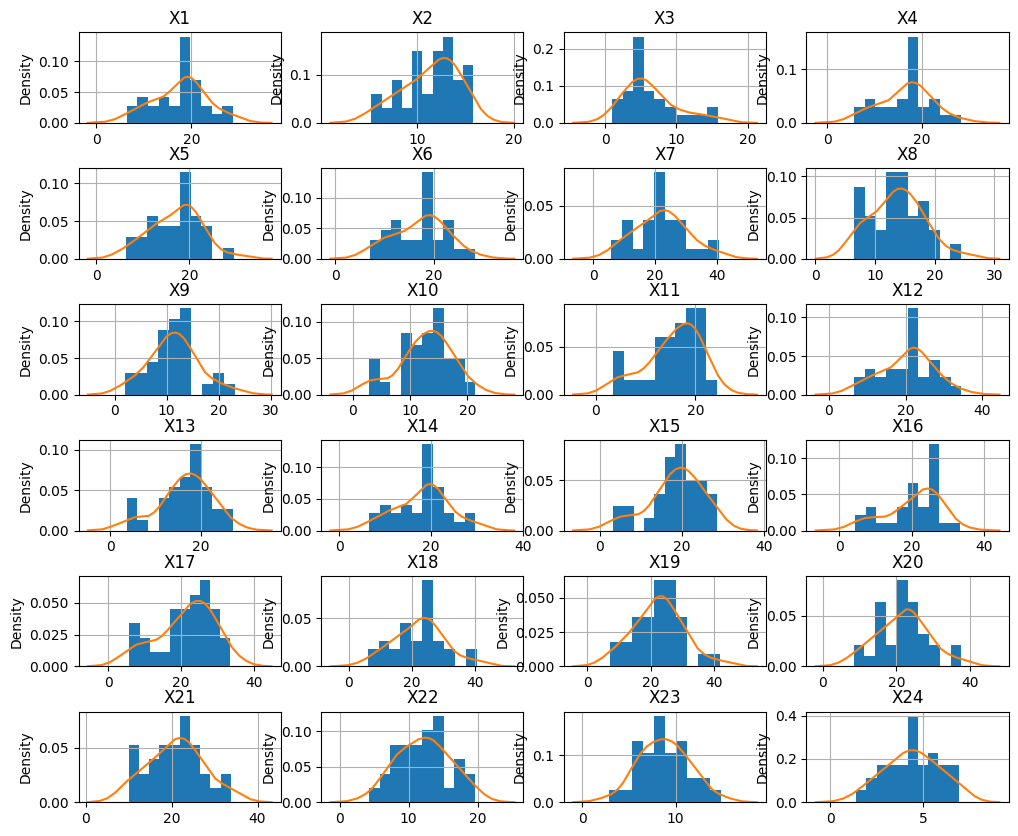

In [6]:
plt.style.use('fast')
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(12,10))
plt.subplots_adjust(hspace=0.5)
for ax, col in zip(axs.flat, df.columns):
    ax.hist(df[col], bins=10, density=True)
    sns.kdeplot(df[col], ax=ax)
    ax.grid(True)
    ax.set_title(col)
    ax.set_xlabel('')

Na podstawie wykresów możemy stwierdzić widoczną jednomodalność rozkładów, względną symetrię oraz różnice w obserwowanych spłaszczeniach krzywej. Dwie ostatnie obserwacje dodatkowo zweryfikujemy w dalszej części pracy.

## Satystyki opisowe

W tej części policzymy i zinterpretujemy statystyki opisowe naszego zbioru danych. Do podstawowych statystyk liczonych przez pakiet Pandas dodaliśmy obliczoną [skośność](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html#scipy.stats.skew) i [kurtozę](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html). 

In [7]:
skewnesses = skew(new_df, axis=0)
kurtosises = kurtosis(new_df, axis=0)
pd.concat([new_df.describe(), pd.DataFrame({'skewness':skewnesses, 'kurtosis':kurtosises}, index=new_df.columns).T]).T

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
X1,32.0,17.671875,5.471052,6.4,14.400,18.55,20.600,28.7,-0.181180,-0.376567
X2,32.0,11.371875,2.807505,5.3,9.775,11.95,13.350,15.8,-0.537643,-0.600688
X3,32.0,6.321875,3.664189,1.0,4.075,5.40,7.900,15.8,1.009990,0.445025
X4,32.0,17.065625,5.375188,5.6,14.250,17.70,20.650,28.3,-0.291134,-0.385678
X5,32.0,17.533125,5.453888,6.3,13.400,18.45,21.125,29.6,-0.204242,-0.382600
X6,32.0,17.613750,5.335404,7.1,13.300,18.65,21.425,28.3,-0.295805,-0.666051
X7,32.0,22.078125,8.239274,5.9,16.400,22.65,26.650,40.6,0.131496,-0.324088
X8,32.0,13.665625,4.312144,6.5,11.225,13.85,16.500,24.4,0.191824,-0.259796
X9,32.0,11.350000,4.700309,1.9,8.450,10.75,13.875,23.1,0.211525,0.215907
X10,32.0,12.681250,4.506228,2.9,10.175,13.20,15.725,21.4,-0.516804,-0.003552


## Weryfikacja skośności i kurtozy rozkładów zmiennych.

Obliczone statystyki skośności i kurtozy stanowią jednak estymację parametrów z populacji, przy takiej małej liczebności każdej próby (n=32) dodatkowo obarczone znacznym błędem. Żeby poznać choć ogólny kształt tych rozkładów skorzystamy z przedziałów ufności (zarówno dla kurtozy jak i skośności) skonstruowanych za pomocą nieparametrycznej metody Bootstrap. Bedzie to o tyle zmodyfkiowana metoda Bootstrap, że skorzystamy ze zmodyfkowanych przedziałów ufności drugiego rzędu uzyskanych metodą BCa (Bias-Corrected and Accelerated). Różni się on od metody pierwszego rzędu, że używa innej niż percentyl miary do określania przedziałów, bierze pod uwagę skośność ponownie pobieranych prób oraz stara się estymować parametr dla rzeczywistej populacji a nie ów prób. Więcej o tej metodzie [w tym artykule](https://www.tandfonline.com/doi/abs/10.1080/01621459.1987.10478409)

In [8]:
def skew_statistic(data):
    return skew(data, axis=0)

def kurtosis_statistic(data):
    return kurtosis(data, axis=0)

data = (new_df.values[i] for i in range(new_df.shape[1]))
def bootstrap_for_xses(df, statistic, n_resamples=1000):
    skewness_mean = np.zeros(df.shape[1])
    kurtosis_mean = np.zeros(df.shape[1])
    skewness_intervals = np.zeros((df.shape[1], 2))
    kurtosis_intervals = np.zeros((df.shape[1], 2))
    for column in range(df.shape[1]):
        data = (df.values[column],)
        skewness_bootstrap = bootstrap(data=data, statistic=skew_statistic, n_resamples=n_resamples, confidence_level=.9)
        kurtosis_bootstrap = bootstrap(data=data, statistic=kurtosis_statistic, n_resamples=n_resamples, confidence_level=.9)
        skewness_mean[column] = np.mean(skewness_bootstrap.bootstrap_distribution)
        kurtosis_mean[column] = np.mean(kurtosis_bootstrap.bootstrap_distribution)
        skewness_intervals[column, :] = np.array(tuple(skewness_bootstrap.confidence_interval))
        kurtosis_intervals[column, :] = np.array(tuple(kurtosis_bootstrap.confidence_interval))
                           
    return skewness_mean, kurtosis_mean, skewness_intervals, kurtosis_intervals
                           
        
                          
s, k, s_i, k_i = bootstrap_for_xses(new_df, skew_statistic, n_resamples=5000)

Skonstruowane przedziały liczymy dla każdej zmiennej, przy użyciu 5000 ponownych próbkowań. Jako że każda zmienna ma 32 wartości, to możliwa liczba wszystkich kombinacji losowania ze zwracaniem to około (dla niepowtarzających się wartości) $32^{32}$, więc nie jest to na pewno za dużo próbkowań, a w metodzie Bootstrap nie tyle ten parametr jest najistotniejszy w zawężaniu przedziałów, co rozmiar próby, który w naszym przypadku jest ograniczony przez liczbę państw w badaniu (a i również obecnych w Europie). Zdecydowaliśmy się na kompromis w zakresie poziomu ufności, który w celu niezbyt szeroki przedziałów, ale dalej wysokiej pewności ustaliliśmy w obu przypadkach na 90%.

Teraz zbudujemy funkcję, która będzie dla obliczonych poziomów średnich liczonych statystyk oraz przedziałów ufności dla nich rysować wykres, gdzie pionowa linia to zakres przedziału, który z prawdopodobieństwem 90% pokrywa szukany parametr, a punkt oznacza wyestymowaną metodą Bootstrap wartość szukanej statystyki.

In [9]:
def plot_statistic(statistic, confidence_intervals, name='statystyki', conf_level=.9):
    fig, ax = plt.subplots(figsize=(10,8))
    for i in range(statistic.shape[0]):
        plt.vlines(i, confidence_intervals[i,0], confidence_intervals[i,1], color='gray', zorder=0)
    ax.scatter(np.arange(statistic.shape[0]), statistic, color='black', zorder=1)
    plt.grid(False)
    plt.axhline(0, linestyle='--', alpha=0.5)
    ax.set_xticks(np.arange(statistic.shape[0]), labels=[f"X_{j}" for j in range(1, statistic.shape[0]+1)], rotation=45)
    ax.set_ylabel(name)
    plt.title(f"Średnia {name}, wraz z przedziałem ufności na poziomie ufności {conf_level}")
    



Przyjęta koncpecja zakłada, że skośność równa zero oznacza skośność rozkładu normalnego (symetryczna), gdzie wartości mniejsze od 0 oznaczają rozkład lewostronnie asymetryczny, a większe od 0 oznaczają rozkład prawostronnie symetryczny. W przypadku kurtozy skorzystaliśmy z definicji Fishera, kurtoza równa zero to spłaszczenie rozkładu charakterystyczne dla rozkładu normalnego, większa od 0 oznacza rozkład leptokurtyczny, a mniejsza od 0 rozkład platykurtyczny. 

### Wykres dla skośności

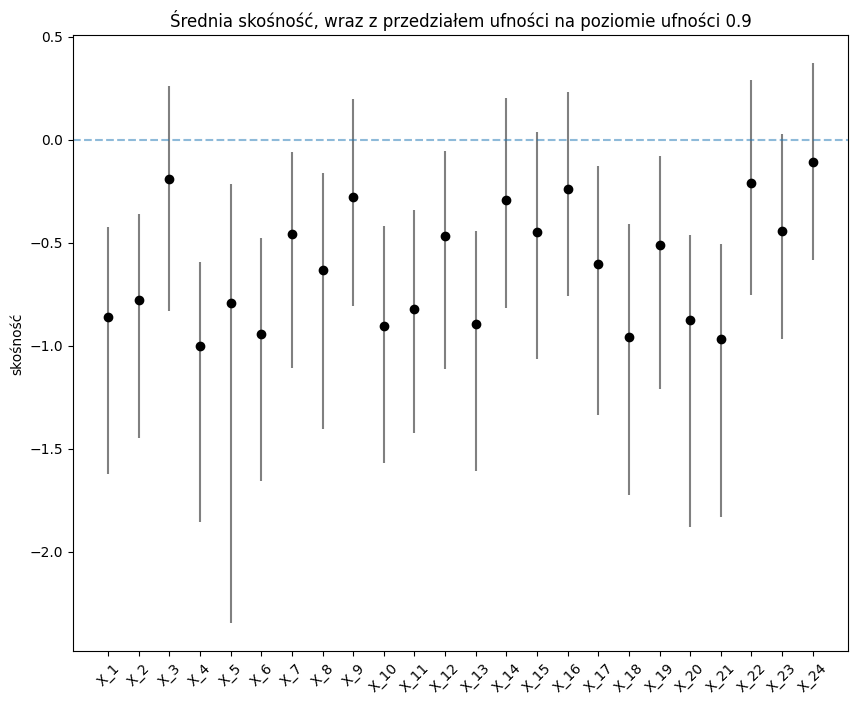

In [10]:
plot_statistic(s, s_i, name="skośność")

### Wykres dla kurtozy

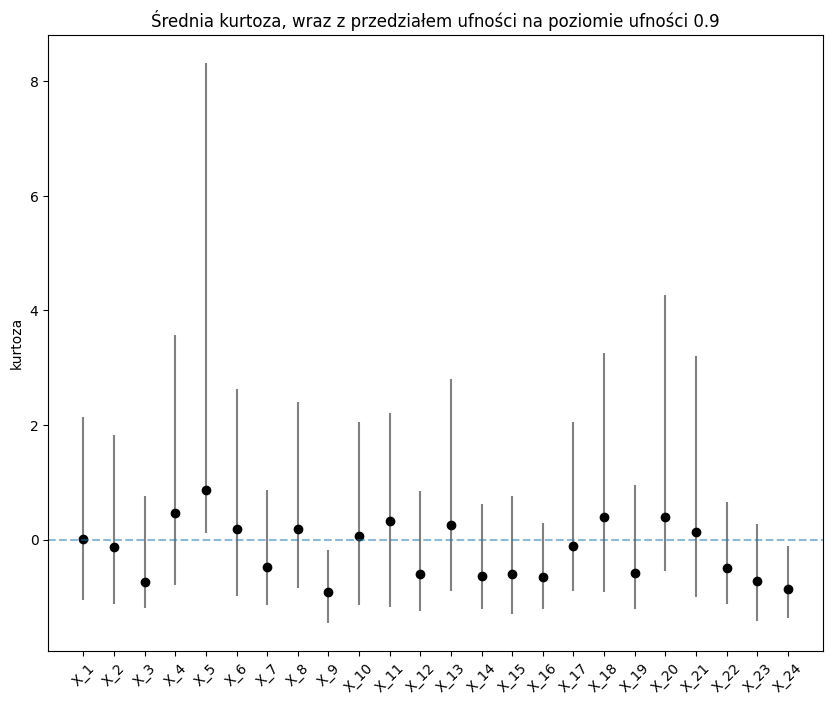

In [11]:
plot_statistic(k, k_i, name="kurtoza")

Z uwagi na bardzo małą wielkość każdej z prób (n=32), estymacje otrzymane za pomocą bootstrap nie są zbyt wiarygodne, ale pokazują że dane często nie są istotnie różne od rozkładu normalnego (częste pokrywanie wartości kurtozy i skośności równej 0).

# 4. Przygotowanie danych do Analizy Skupień.


### Standaryzowanie zmiennych

W tym kroku wykonamy standaryzację zmiennych w celu przygotowania do analizy skupień. Dokonamy standaryzacji zmiennych, żeby skala cechy nie wpływała na jej udział w klastrze. Standaryzacja zostanie wykonana za pomocą obiektu klasy [sklearn.preprocessing.Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler), który jednak nie robi nic innego jak stosuje wzór:

$$X_i^* = \frac{X_i - E(X_i)}{\sqrt{D^2(X_i)}}$$



In [12]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(new_df)

In [13]:
scaled_df = pd.DataFrame(scaled_df, index=new_df.index, columns=new_df.columns)
final_df = scaled_df.copy()

### Redukcja wymiarów

Przygotujemy również dane za pomocą algorytmu Prinicipal Component Analysis do wyświetlenia na płaszczyźnie dwu-wymiarowej, żeby lepiej móc obserwować efekty klastrowania. Jako, że nie jest to temat naszej pracy, więcej informacji na temat tej metody można znaleźć [tutaj](https://en.wikipedia.org/wiki/Principal_component_analysis). Nasz projekt wykorzystał implementację tego algorytmu pod postacią obiektu klasy [sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), gdzie liczba składowych została ustawiona (w celach wizualizacji) na 2, a [rozkład według wektorów osobliwych](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych) został dokonany metodą LAPACK (metoda której korzenie sięgają języka Fortran).

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
dim_reduced_df = pca.fit_transform(final_df)

### Wyświetlanie wyników

Poniżej przygotowaliśmy funkcję, której zastosowanie w prezentowaniu wyników jest szerokie:
    - w przypadku braku podziałów (brak dostraczonych "predykcji" przynależności do klastra) nie wyświetla tytułu i nie nadaje wyróżniających kolorów punktom
    - w przypadku dostarczonych predykcji, nadaje tytuł wyjaśniający jaka metoda została użyta, dla ilu klastrów oraz na koniec koloruje punkty zgodnie z przynależnością do klastra
    
Zdecydowaliśmy się na czarny kolor tła, ze względu na większą czytelnośc kontrastujących kolorów.

In [28]:
def plot_results(df_dim_2, title='', cluster_preds=np.array([])):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
    plt.style.use('dark_background')
    if cluster_preds.size:
        ax.set_title(f"Podział obiektów według metody {title}, liczba klastrów = {np.unique(cluster_preds).shape[0]}")
        ax.scatter(dim_reduced_df[:, 0], dim_reduced_df[:, 1], c=cluster_preds, cmap='cool')
    else:
        ax.scatter(dim_reduced_df[:, 0], dim_reduced_df[:, 1])
    for num, country in enumerate(final_df.index):
        plt.text(dim_reduced_df[num, 0], dim_reduced_df[num,1], country)

Poniżej wyniki redukcji wymiarów metodą PCA na naszym zbiorze danych:

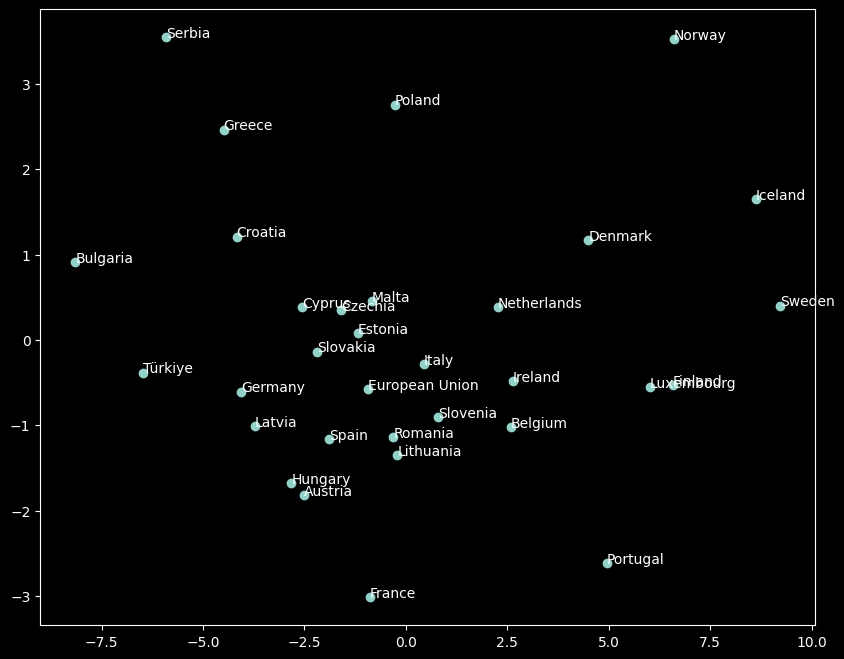

In [29]:
plot_results(dim_reduced_df)

# 5. Zastosowanie przykładowych modeli klastrujących.


W tej sekcji pokażemy zastosowanie kilku wybranych algorytmów z biblioteki [sklearn.cluster](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) na naszych danych.

## Import biblioteki oraz miar jakości klastrowania

In [30]:
import sklearn.cluster as cl
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

### Miary jakości klastrowania

W obliczu takiej mnogości metod oraz tak dużej liczby kombinacji hyperparametrów, musieliśmy skorzystać z obiektywnych miar jakości klastrowania. Skorzystaliśmy z tych dostępnych w pakiecie [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics). \
Są to:
1. Silhouette Coefficient - miara jakości klastrowania, która mierzy dopasowanie obiektów do ich klastrów oraz ich odległość do innych klastrów. Więcej na temat tej miary można poczytać [na artykule na Wikipedii](https://en.wikipedia.org/wiki/Silhouette_(clustering)) lub [u źródła](https://www.sciencedirect.com/science/article/pii/0377042787901257). Przyjmuje wartości z przedziału $[-1,  1]$. Gdzie im wyższy współczynnik tym lepsza jakoś klastrowania.
2. Caliński-Harabasz Index - miara jakości klastrowania, która mierzy rozdzielność klastrów. Wyznacza się ją jako stosunek sumy wariancji międzyklastrowej do sumy wariancji wewnątrzklastrowej. Przyjmuje wartości z przedziału $[0, +\infty)$, gdzie wyższe wartości oznaczają, że klastry są bardziej gęste i lepiej oddzielone od siebie. Więcej na temat tej metody w [artykule](https://www.tandfonline.com/doi/abs/10.1080/03610927408827101) 
3. Davies-Bouldin Index - miara jakości klastrowania, która mierzy podobieństwo klastrów. Wyznacza się ją jako średnią wartość indeksu Davies-Bouldina dla wszystkich klastrów. Przyjmuje wartości z przedziału $[0, +\infty)$, im wyższa wartość miary, tym mniejsze podobieństwo klastrów. Więcej szczegółów w tym [artykule](https://ieeexplore.ieee.org/document/4766909)

### Funkcja do klastrowania

Przygotowaliśmy funkcję, której działanie jest podstawą naszej analizy. Możemy wybrać tryb kreślenia wykresu (plot=True), gdzie metoda klastrowania zostanie zastosowana na danych, wypisane zostaną miary jakości klatrowania (ale nie zwrócone) oraz wykres punktowy za pomocą funkcji *plot_results* zostanie wykonany. W przypadku flagi plot z wartością False, zostaną po prostu zwrócone wartości miar wymienonych w poprzednim punkcie dla danej metody.

In [18]:
def fit_and_show(model, name='', plot=True):
    results = model.fit_predict(final_df)
    if plot:
        plot_results(final_df, name, results)
        print(f"Silhouette Coef: {silhouette_score(final_df, results)}")
        print(f"Calinski-Harabasz Index: {calinski_harabasz_score(final_df, results)}")    
        print(f"Davies-Bouldin Index: {davies_bouldin_score(final_df, results)}")  
        return
    return silhouette_score(final_df, results), calinski_harabasz_score(final_df, results), davies_bouldin_score(final_df, results)

### KMeans

Silhouette Coef: 0.3452657497888547
Calinski-Harabasz Index: 31.11769535755412
Davies-Bouldin Index: 0.913465823441002


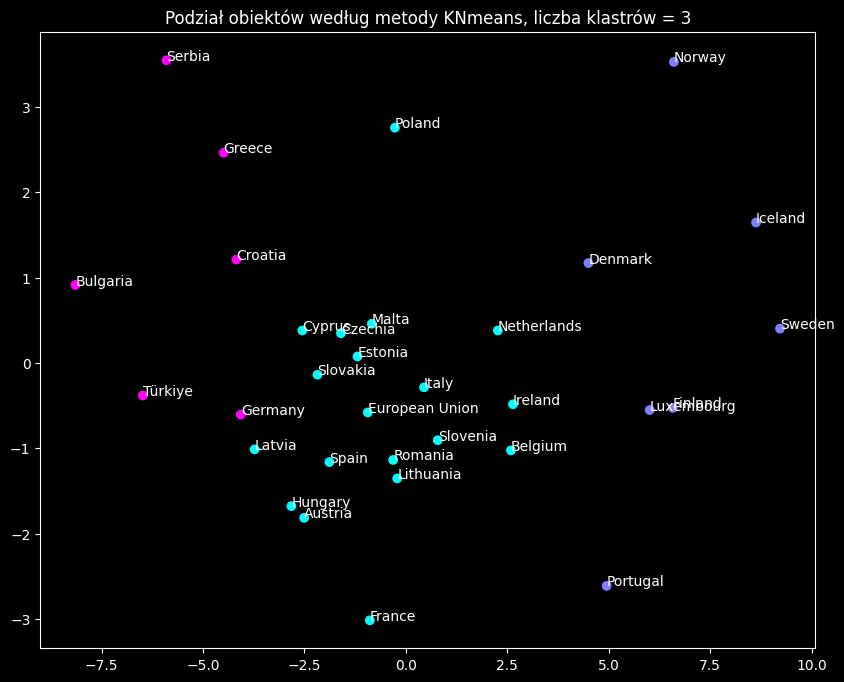

In [19]:
fit_and_show(cl.KMeans(n_clusters=3), name='KNmeans')

### GaussianMixture

Silhouette Coef: 0.3452657497888547
Calinski-Harabasz Index: 31.11769535755412
Davies-Bouldin Index: 0.913465823441002


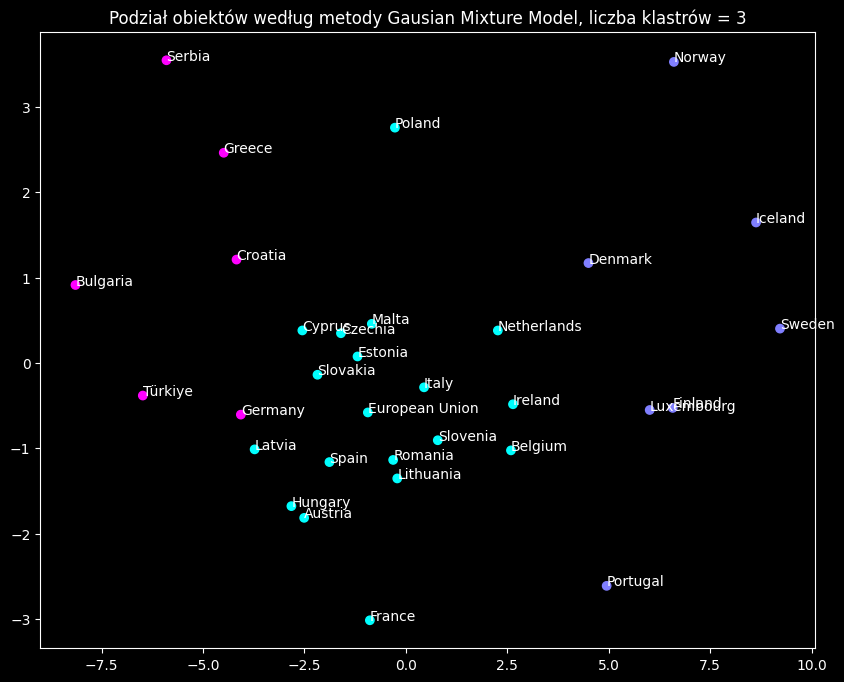

In [20]:
from sklearn.mixture import GaussianMixture

fit_and_show(GaussianMixture(n_components=3), name='Gausian Mixture Model')

### Metoda Warda

Silhouette Coef: 0.3607635491036063
Calinski-Harabasz Index: 30.56751709378477
Davies-Bouldin Index: 0.8728271437543106


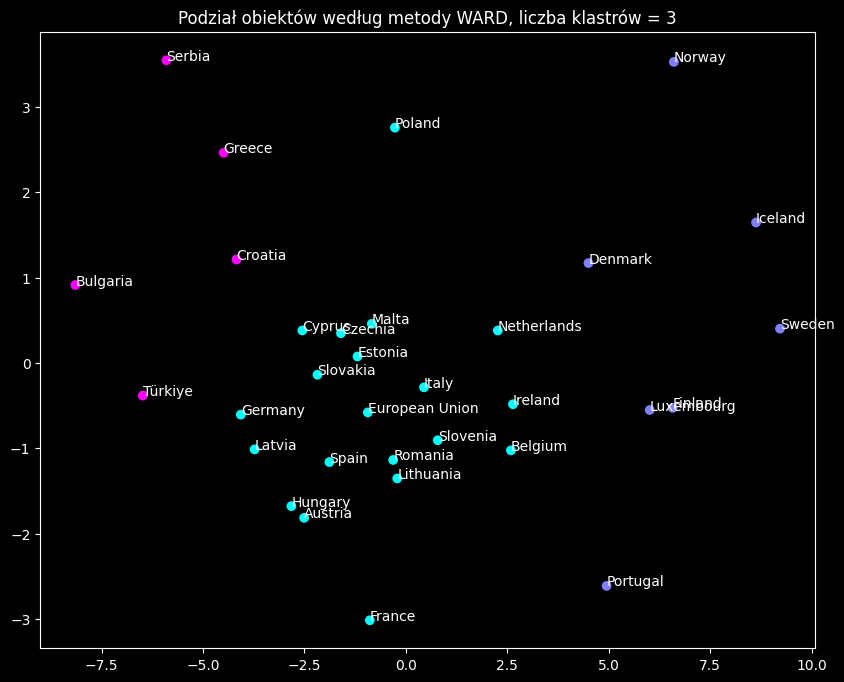

In [21]:
fit_and_show(cl.AgglomerativeClustering(n_clusters=3, linkage='ward'), name='WARD')

# 6. Dobór najlepszej metody klatrującej i odpowiedniej liczby klastrów.


W poprzedniej sekcji widzieliśmy działanie przykładowych modeli klastrujących na naszym zbiorze danych. W tej sekcji za pomocą trzech indeksów (wprowadzonych wcześniej) wybierzemy najlepszą metodę z większości dostępnych w pakiecie *sklearn.cluster*. Również dobierzemy odpowiednie hyperparametry liczby klastrów. Dobór będzie oparty o trzy wymienione wcześniej wskaźniki. 


### Użyte metody

Wykorzystane algorytmy to większość z dostępnych w ramach pakietu [sklearn.cluster](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) oraz metodę [sklearn.mixture.GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture).

Lista wraz z krótszym opisem metod:
- [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) - metoda hierarchiczna, która łączy obiekty w klastry w oparciu o ich odległość. Można użyć różnych metryk odległości. W naszym przypadku użyjemy metody Warda.
- [Birch](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html) - metoda hierarchiczna, która wykorzystuje drzewo decyzyjne do tworzenia klastrów.
- [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) - metoda niehierarchiczna, która przypisuje obiekty do klastrów w oparciu o ich odległość od ich najbliższego centrum klastra (tzw. centroida).
- [BisectingKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.BisectingKMeans.html) - rozszerzenie metody KMeans, która dzieli zbiory na klastry w sposób iteracyjny.
- [MiniBatchKMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html) - wersja metody KMeans, która wykorzystuje minipakiety danych do obliczania centrów klastrów. Szybsza od klasycznej, może mniej dokładna. Wrzucona tutaj z ciekawości.
- [SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html) - technika mająca swoje korzenie w teorii grafów, w której to podejście jest wykorzystywane do identyfikowania społeczności węzłów w grafie na podstawie łączących je krawędzi.
- [GaussianMixture](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) - metoda probabilistyczna, która zakłada, że dane pochodzą z mieszaniny rozkładów Gaussa.

Poniżej lista zaimportowanych modeli:

In [22]:
models = [cl.AgglomerativeClustering, cl.Birch, cl.KMeans, cl.BisectingKMeans, cl.MiniBatchKMeans, cl.SpectralClustering, GaussianMixture]

Przygotujemy multindex, żeby móc zapisać każdej metodzie wartości trzech indeksów.

In [23]:
import itertools
index = [np.array(list(itertools.chain.from_iterable([[model_name.__name__]*3 for model_name in models]))), np.array(['Silhouette Coef', 'Calinski-Harabasz Index', 'Davies-Bouldin Index'] * len(models))]
results = pd.DataFrame(np.zeros((index[0].shape[0], 9)), index=index, columns=np.arange(2, 11)) #inicjujemy pusty DataFrame na wyniki


Liczymy wartości miar dla wszystkich metod, z różnymi liczbami klastrów (od 2 do 11).

In [24]:
for num_clasters in range(2, 11):
    for model in models:
        try:
            sc, chi, dbi = fit_and_show(model(n_clusters=num_clasters), plot=False)
        except Exception as e:
            sc, chi, dbi = fit_and_show(model(n_components=num_clasters), plot=False)
        results.loc[(model.__name__, 'Silhouette Coef'), num_clasters] = sc
        results.loc[(model.__name__, 'Calinski-Harabasz Index'), num_clasters] = chi
        results.loc[(model.__name__, 'Davies-Bouldin Index'), num_clasters] = dbi
        


Poniżej DataFrame który przedstawia dla każdej użytej metody klastrowania wyliczone trzy wcześniej wspomniane miary jakości klastrowania, wraz ze zmieniającą się liczbą klastrów.

In [25]:
results

2          3   \
AgglomerativeClustering Silhouette Coef           0.467550   0.360764   
                        Calinski-Harabasz Index  32.295371  30.567517   
                        Davies-Bouldin Index      0.699866   0.872827   
Birch                   Silhouette Coef           0.467550   0.360764   
                        Calinski-Harabasz Index  32.295371  30.567517   
                        Davies-Bouldin Index      0.699866   0.872827   
KMeans                  Silhouette Coef           0.453253   0.334457   
                        Calinski-Harabasz Index  37.242326  31.561393   
                        Davies-Bouldin Index      0.782450   0.947130   
BisectingKMeans         Silhouette Coef           0.453253   0.317963   
                        Calinski-Harabasz Index  37.242326  30.671855   
                        Davies-Bouldin Index      0.782450   1.027203   
MiniBatchKMeans         Silhouette Coef           0.453253   0.337302   
                        Calinski-Harabasz Index  37.242326  30.926591   
                        Davies-Bouldin Index      0.782450   0.983394   
SpectralClustering      Silhouette Coef           0.399919   0.343277   
                        Calinski-Harabasz Index  12.957842  14.937617   
                        Davies-Bouldin Index      0.624935   0.815005   
GaussianMixture         Silhouette Coef           0.453253   0.321115   
                        Calinski-Harabasz Index  37.242326  31.382767   
                        Davies-Bouldin Index      0.782450   0.978571   

                                                        4          5   \
AgglomerativeClustering Silhouette Coef           0.231688   0.209568   
                        Calinski-Harabasz Index  26.463591  22.389027   
                        Davies-Bouldin Index      1.041464   1.190731   
Birch                   Silhouette Coef           0.231688   0.209568   
                        Calinski-Harabasz Index  26.463591  22.389027   
                        Davies-Bouldin Index      1.041464   1.190731   
KMeans                  Silhouette Coef           0.294633   0.177728   
                        Calinski-Harabasz Index  26.880599  22.892973   
                        Davies-Bouldin Index      1.018912   1.296234   
BisectingKMeans         Silhouette Coef           0.236433   0.116440   
                        Calinski-Harabasz Index  23.087534  14.450437   
                        Davies-Bouldin Index      1.184079   1.721916   
MiniBatchKMeans         Silhouette Coef           0.294633   0.228468   
                        Calinski-Harabasz Index  26.880599  21.509910   
                        Davies-Bouldin Index      1.018912   1.187710   
SpectralClustering      Silhouette Coef           0.038366   0.094384   
                        Calinski-Harabasz Index  10.594813  13.272259   
                        Davies-Bouldin Index      1.155908   1.120455   
GaussianMixture         Silhouette Coef           0.267586   0.202254   
                        Calinski-Harabasz Index  26.615580  23.600918   
                        Davies-Bouldin Index      1.015719   1.253174   

                                                        6          7   \
AgglomerativeClustering Silhouette Coef           0.191852   0.185058   
                        Calinski-Harabasz Index  20.433568  18.787742   
                        Davies-Bouldin Index      1.232915   1.243733   
Birch                   Silhouette Coef           0.191852   0.185058   
                        Calinski-Harabasz Index  20.433568  18.787742   
                        Davies-Bouldin Index      1.232915   1.243733   
KMeans                  Silhouette Coef           0.201236   0.179506   
                        Calinski-Harabasz Index  21.611925  18.658978   
                        Davies-Bouldin Index      1.188793   1.209329   
BisectingKMeans         Silhouette Coef           0.141489   0.152102   
                        Calinski-Haraba

Obiecującą metodą jest K-Means dla dwóch klastrów, która ma wysoki współczynnik Silhouette Coefficient, bardzo wysoki wskaźnik Calinski-Harabasz Index i Davies-Bouldin Index na dość wysokim poziomie. Wyświetlę więc wyniki tej metody. Jeżeli chcielibyśmy uzyskać rozwiązanie dla 3 klastrów, też będziemy korzystali z metody K-Means.

# 7. Wyniki

Silhouette Coef: 0.4532526668267554
Calinski-Harabasz Index: 37.24232575602608
Davies-Bouldin Index: 0.7824495979443283


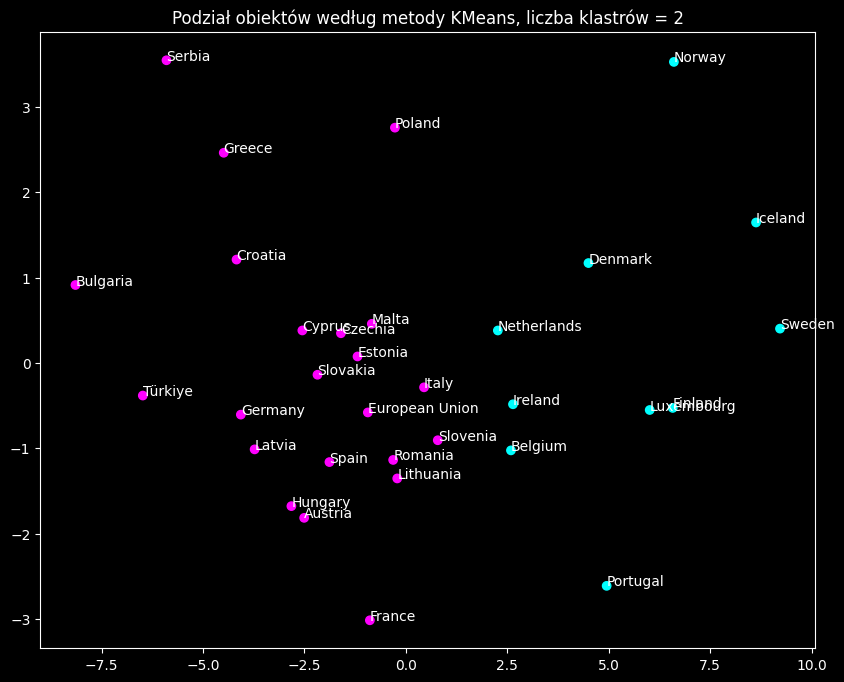

In [26]:
fit_and_show(cl.KMeans(n_clusters=2), plot=True, name='KMeans')

Silhouette Coef: 0.3211145666232551
Calinski-Harabasz Index: 31.382767318572526
Davies-Bouldin Index: 0.9785705821451872


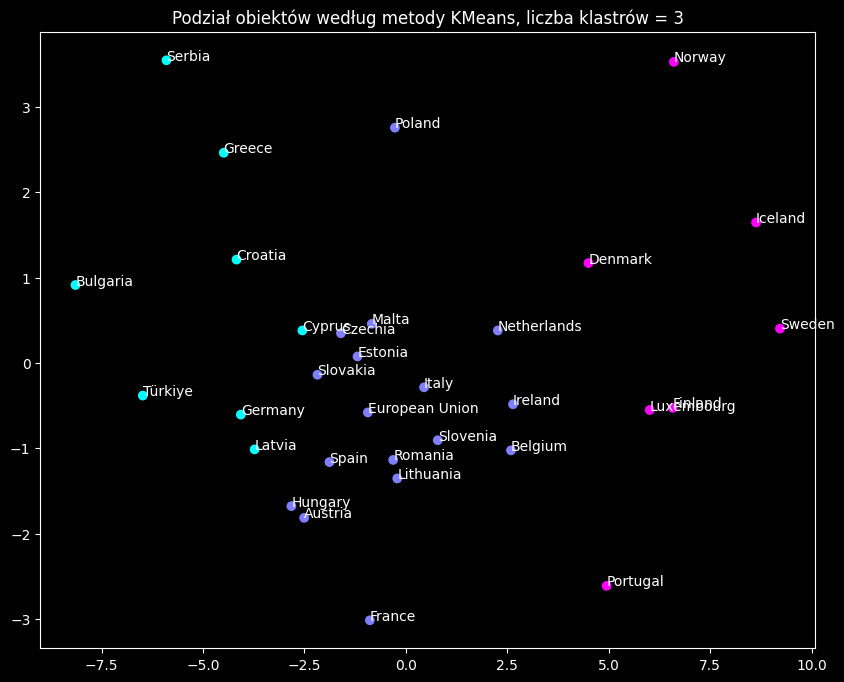

In [27]:
fit_and_show(cl.KMeans(n_clusters=3), plot=True, name='KMeans')

# 8. Wnioski

Uzyskane podziały sugerują zgodne z odczuciami empirycznymi wnioski.

Dla podziału na dwa skupienia:
Europa w swoich zwyczajach związanych z paleniem podzieliła się na grupy:
- mało palące: cała Skandynawia, wszystkie kraje Beneluxu, Portugalia i Irlandia
- palące częściej: reszta krajów

Dla podziału na trzy skupienia (który z obliczonych mair jest gorszy):
- cała Skandynawia i Portugalia dalej w oddzielnym skupieniu (kraje potencjalnie mniej palące)
- grupa umiarkowanie palące: kraje Europy środkowej i większośc krajów zachodu (bez Niemiec)
- grupa mająca większe skłonności do palenia: kraje bałkańskie, Grecja, Turcja, Niemcy oraz Łotwa